<a href="https://colab.research.google.com/github/JakeOh/202504_itwill_oracle88/blob/main/python21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 패키지 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tips 데이터셋

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Box Plot(상자 그림)

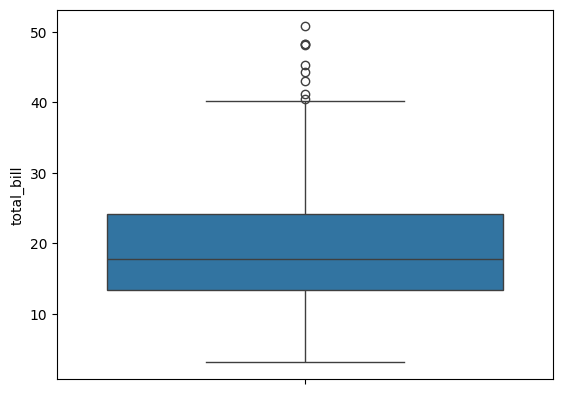

In [4]:
sns.boxplot(data=tips, y='total_bill')
plt.show()

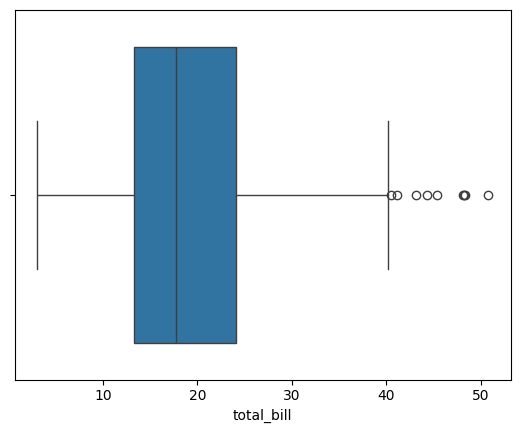

In [5]:
sns.boxplot(data=tips, x='total_bill')
plt.show()

성별 tip의 box plot

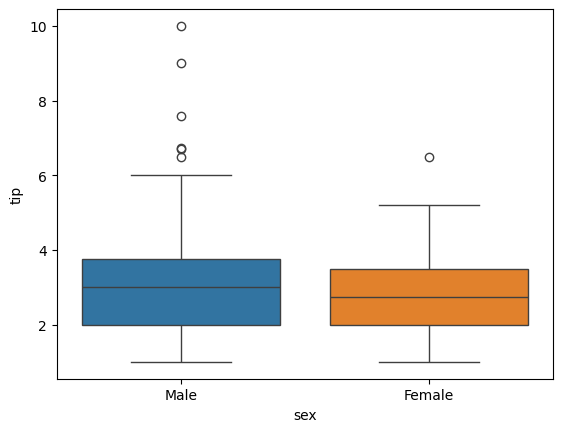

In [9]:
sns.boxplot(data=tips, x='sex', y='tip', hue='sex')
plt.show()

In [7]:
tips[tips.sex == 'Male'].tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [8]:
tips[tips.sex == 'Female'].tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


요일별 tip의 box plot

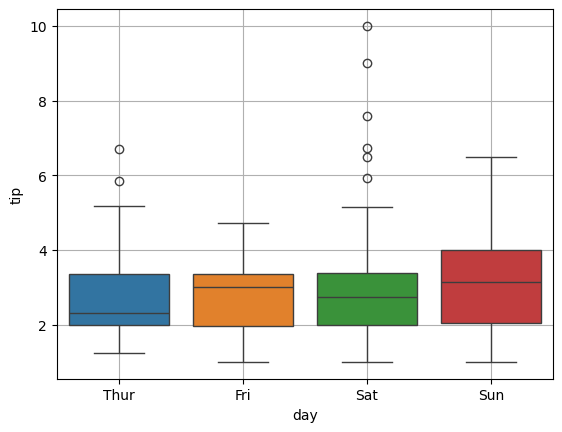

In [12]:
sns.boxplot(data=tips, x='day', y='tip', hue='day')

plt.grid()
plt.show()

subplot(nrows=1, ncols=2)을 생성하고, 흡연여부별 tip의 box plot과 시간별 tip의 box plot

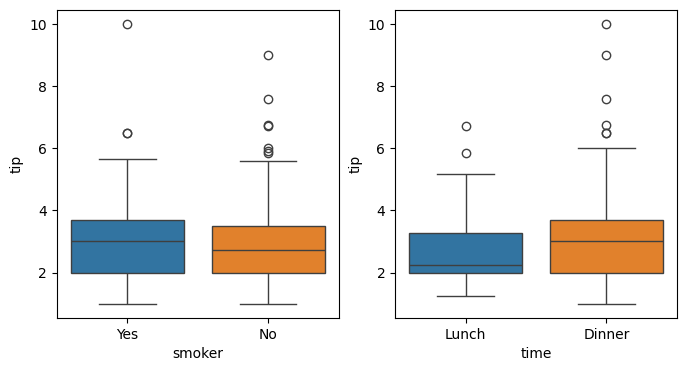

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

sns.boxplot(data=tips, x='smoker', y='tip', hue='smoker', ax=axes[0])
sns.boxplot(data=tips, x='time', y='tip', hue='time', ax=axes[1])

plt.show()